In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas_datareader as web
import seaborn as sns

In [2]:
df = web.DataReader('aapl', 'yahoo', '2018-01-01', '2021-01-01')

In [3]:
components = seasonal_decompose(df['Adj Close'], model='multiplicative', period=21)

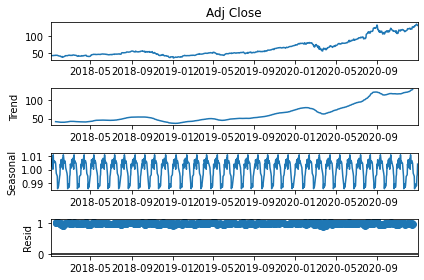

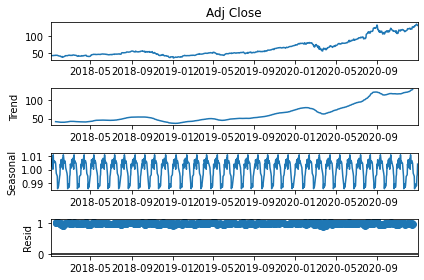

In [17]:
components.plot()

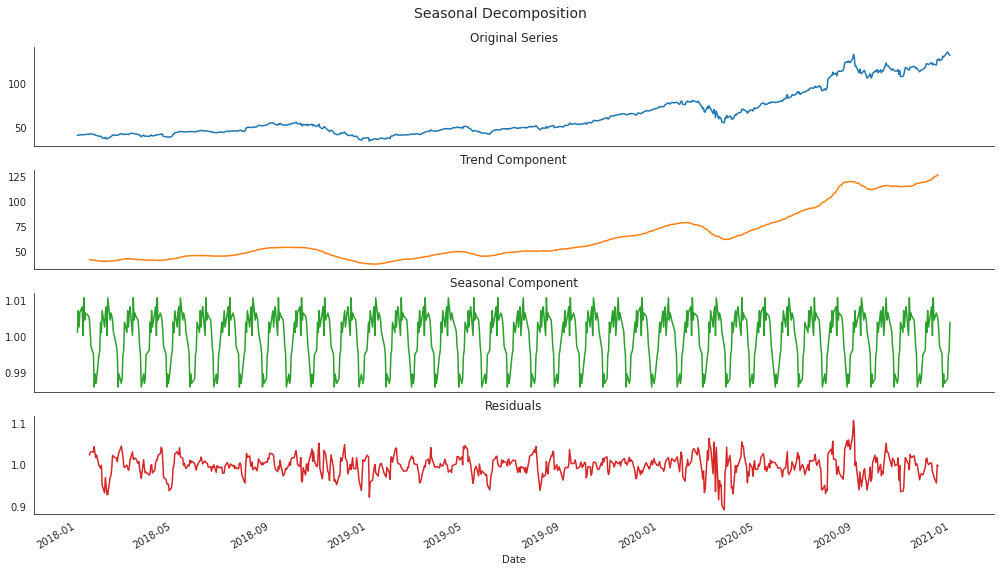

In [32]:
figure1 = plt.Figure(figsize=(5,5), dpi=100)
ax1 = figure1.add_subplot(111)

ts = (df['Adj Close'].to_frame('Original')
      .assign(Trend=components.trend)
      .assign(Seasonality=components.seasonal)
      .assign(Residual=components.resid))
with sns.axes_style('white'):
    ts.plot(subplots=True, figsize=(14, 8), title=['Original Series', 'Trend Component', 'Seasonal Component','Residuals'], legend=False)
    plt.suptitle('Seasonal Decomposition', fontsize=14)
    sns.despine()
    plt.tight_layout()
    plt.subplots_adjust(top=.91);

In [10]:
ts

,Original,Trend,Seasonality,Residual
Date,,,,
2018-01-02,41.380238,NaN,1.001236,NaN
2018-01-03,41.373032,NaN,1.007293,NaN
2018-01-04,41.565216,NaN,1.002736,NaN
2018-01-05,42.038452,NaN,1.006826,NaN
2018-01-08,41.882305,NaN,1.008386,NaN
...,...,...,...,...
2020-12-24,131.773087,NaN,0.987020,NaN
2020-12-28,136.486053,NaN,0.988319,NaN
2020-12-29,134.668762,NaN,0.994990,NaN


In [15]:
figure1 = plt.Figure(figsize=(5,5), dpi=100)
ax1 = figure1.add_subplot(111)
ts['Trend']

Date
2018-01-02   NaN
2018-01-03   NaN
2018-01-04   NaN
2018-01-05   NaN
2018-01-08   NaN
              ..
2020-12-24   NaN
2020-12-28   NaN
2020-12-29   NaN
2020-12-30   NaN
2020-12-31   NaN
Name: Trend, Length: 756, dtype: float64

In [16]:
ts.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=756, freq=None)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

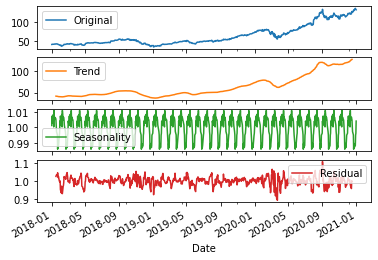

In [24]:
ts.plot(subplots=True)

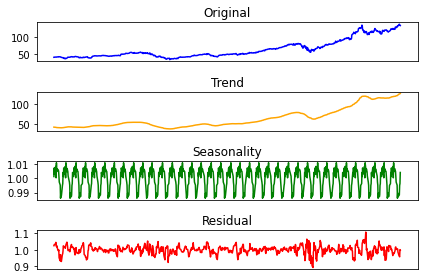

In [48]:
fig, ax = plt.subplots(4)
ax[0].plot(ts['Original'], c='blue')
ax[0].get_xaxis().set_visible(False)
ax[0].set_title('Original')

ax[1].plot(ts['Trend'], c='orange')
ax[1].get_xaxis().set_visible(False)
ax[1].set_title('Trend')

ax[2].plot(ts['Seasonality'], c='green')
ax[2].get_xaxis().set_visible(False)
ax[2].set_title('Seasonality')

ax[3].plot(ts['Residual'], c='r')
ax[3].get_xaxis().set_visible(False)
ax[3].set_title('Residual')


plt.tight_layout()

In [29]:
ts

,Original,Trend,Seasonality,Residual
Date,,,,
2018-01-02,41.380238,NaN,1.001236,NaN
2018-01-03,41.373032,NaN,1.007293,NaN
2018-01-04,41.565216,NaN,1.002736,NaN
2018-01-05,42.038452,NaN,1.006826,NaN
2018-01-08,41.882305,NaN,1.008386,NaN
...,...,...,...,...
2020-12-24,131.773087,NaN,0.987020,NaN
2020-12-28,136.486053,NaN,0.988319,NaN
2020-12-29,134.668762,NaN,0.994990,NaN


In [51]:
import mplfinance as fplt